In [1]:
import numpy as np

from Analysis_utils import *
from Plots import *
from scipy.interpolate import CubicSpline

# 3D Embedding

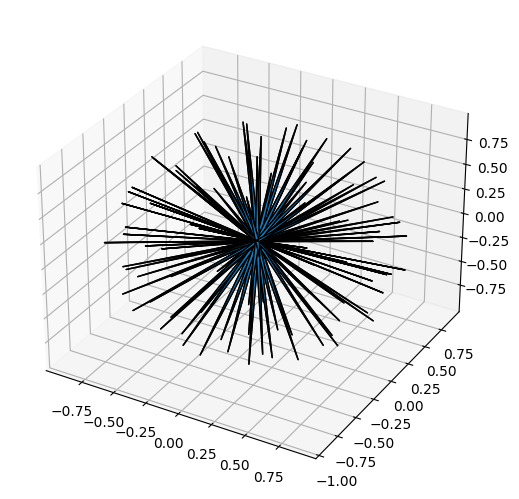

In [2]:
m = Manifold(200)
plot_triangulation_3d(m.adj)

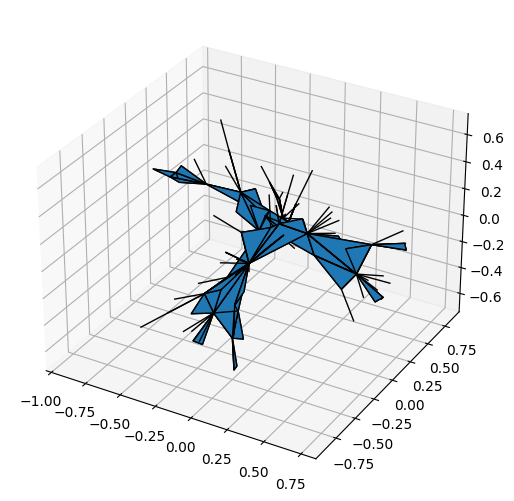

In [3]:
n_sweeps = 200
m.sweep(n_sweeps, 0.1, strategy=['scalar', 'gravity'])
plot_triangulation_3d(m.adj)

In [4]:
is_sphere_triangulation(m.adj)

True

# Graph Representation

In [5]:
l2 = Manifold(4)
l2.sweep(1000)
adj = l2.adj
num_vert, vertex = vertex_list(adj)
edges = triangulation_edges(adj, vertex)
triangles = triangulation_triangles(adj, vertex)
G = nx.Graph(edges)

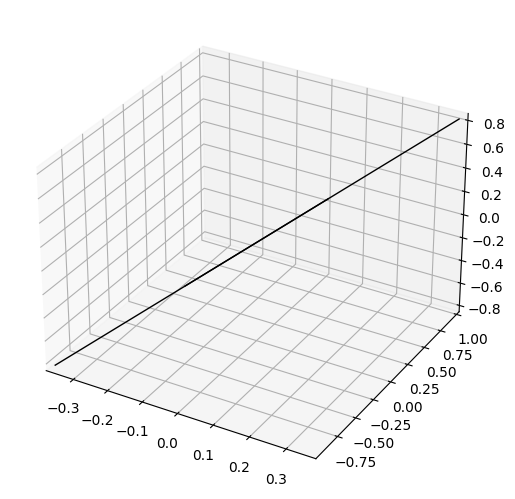

In [6]:
plot_triangulation_3d(l2.adj)

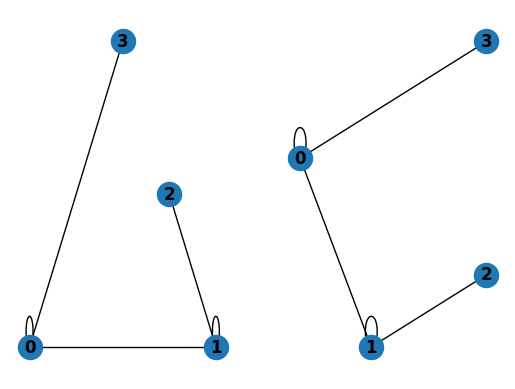

In [7]:
subax1 = plt.subplot(121)
nx.draw_planar(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

# Distance Profile and Haussdorff Dimension

In [8]:
beta=0
sizes = np.array([2*int(i) for i in np.geomspace(10, 20, 3)])
profiles = make_profiles(0, sizes)

20
28
40


[[0.         0.4728708  0.94574161 1.41861241 1.89148322 2.36435402
  2.83722483 3.31009563 3.78296644 4.25583724 4.72870805 5.20157885
  5.67444965 6.14732046 6.62019126]
 [0.         0.43472087 0.86944174 1.30416262 1.73888349 2.17360436
  2.60832523 3.0430461  3.47776698 3.91248785 4.34720872 4.78192959
  5.21665046 5.65137134 6.08609221]
 [0.         0.39763536 0.79527073 1.19290609 1.59054146 1.98817682
  2.38581219 2.78344755 3.18108292 3.57871828 3.97635364 4.37398901
  4.77162437 5.16925974 5.5668951 ]]


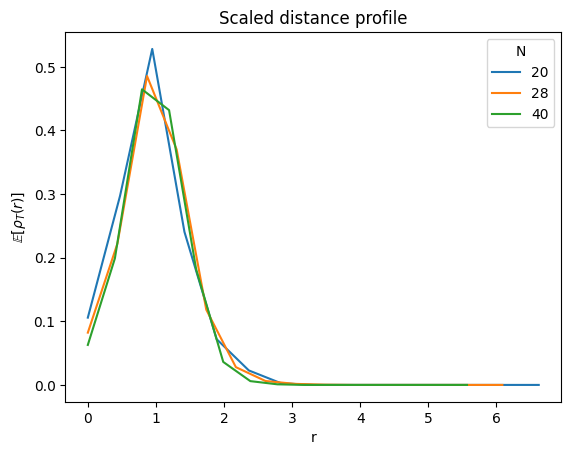

In [9]:
xs, ys = scale_profile(profiles, sizes, 0.25)
print(xs)
overlay_profiles(ys, xs, sizes)

# Finite size scaling

In [10]:
def scale_profile(profiles, sizes, d):
    xs, ys = [], []
    for i, profile in enumerate(profiles):
        rvals = np.arange(len(profile))
        x = rvals / sizes[i] ** d
        y = profile / sizes[i] ** (1 - d)
        xs.append(x), ys.append(y)
        # plt.plot(x, y)
    return np.array(xs), np.array(ys)

def profiles_max(profiles):
    profiles_max = np.max(profiles, axis=1)
    return profiles_max[:,0], profiles_max[:,1]

def power_fit(N, d, a):
    return a*N**d

def lin_fit(x, d, b):
    return b + d*x

def finite_size_scaling(profile, sizes):
    prof_max, sigma_max = profiles_max(profile)
    fit = curve_fit(power_fit, sizes, prof_max, p0=[0.75, 1])
    (d, a), err = fit
    d_H = 1/(1-d)
    d_err = np.sqrt(err[0,0])
    d_H_err = d_H**2*d_err
    a_err = np.sqrt(err[1,1])
    return d_H, d_H_err, a, a_err

def finite_size_scaling_fit(profile, sizes):
    prof_max = np.max(profile, axis=1)
    fit = curve_fit(power_fit, sizes, prof_max, p0=[0.75, 1])
    (d, a), err = fit
    d_H = 1/(1-d)
    d_err = np.sqrt(err[0,0])
    d_H_err = d_H**2*d_err
    a_err = np.sqrt(err[1,1])
    return d_H, d_H_err, a, a_err

In [ ]:
beta=0.2
sizes = [(int(i)//2)*2 for i in np.geomspace(50, 500, 10)]

prof = make_profiles(beta, sizes, strategy=['gravity', 'ising'])


prof_0 = prof[..., 0]
rs0 = np.arange
rs = np.arange(0.1, 10, 0.05)
fit_prof = []


fig, ax = plt.subplots(2)
for profile in prof_0:
    dist_range = range(len(profile))
    cs = CubicSpline(dist_range, profile)
    fit_prof.append(cs(rs))
    ax[0].plot(dist_range, profile)

for p in fit_prof:
    ax[0].plot(rs, p)

y = np.log(np.max(fit_prof, axis=1))
x = np.log(sizes)
ax[1].plot(x, y, 'go-')

fit = curve_fit(lin_fit, x, y, p0=[0.75, 0])
(d, a), err = fit
d_H = 1/(1-d)
d_err = np.sqrt(err[0,0])
d_H_err = d_H**2*d_err
a_err = np.sqrt(err[1,1])

print("with spline fit:")
print(f'{d_H = }' +'+/-'+ f'{d_H_err = }')
print(f'{a = }'+'+/-'+ f'{a_err = }')

d_H, d_H_err, a, a_err = finite_size_scaling(prof, sizes)

print("without spline fit:")
print(f'{d_H = }' +'+/-'+ f'{d_H_err = }')
print(f'{a = }'+'+/-'+ f'{a_err = }')

50
64
82
106


In [ ]:
# CHECK ACCEPTANCE RATE OF ISING MOVES.


ds = np.linspace(3, 5, 50)
x_range = np.arange(0.3, 3, 0.1)
errors = []
min_err = np.inf
min_d = 0
for d in ds:
    splines = []
    xs, ys = scale_profile(prof, sizes, 1/d)
    ys = ys[..., 0]
    for x, y in zip(xs, ys):
        cs = CubicSpline(x, y)
        splines.append(cs(x_range))
    splines = np.array(splines)
    err_spline = np.sum(np.var(splines, axis=0))
    if err_spline < min_err:
        min_err = err_spline
        min_d = d
    errors.append(err_spline)

print(f'{min_d = }')
print(f'{min_err = }')
plt.plot(ds, errors)

In [20]:
xs, ys = scale_profile(prof, sizes, 1/4)
print(xs)
print(ys[..., 0])
for x, y in zip(xs, ys[..., 0]):
    print(x)
    print(y)

[[0.         0.37606031 0.75212062 1.12818093 1.50424124 1.88030155
  2.25636186 2.63242217 3.00848247 3.38454278 3.76060309 4.1366634
  4.51272371 4.88878402 5.26484433]
 [0.         0.34572078 0.69144157 1.03716235 1.38288314 1.72860392
  2.07432471 2.42004549 2.76576628 3.11148706 3.45720785 3.80292863
  4.14864942 4.4943702  4.84009098]
 [0.         0.31622777 0.63245553 0.9486833  1.26491106 1.58113883
  1.8973666  2.21359436 2.52982213 2.84604989 3.16227766 3.47850543
  3.79473319 4.11096096 4.42718872]
 [0.         0.29071537 0.58143074 0.87214611 1.16286147 1.45357684
  1.74429221 2.03500758 2.32572295 2.61643832 2.90715368 3.19786905
  3.48858442 3.77929979 4.07001516]
 [0.         0.26591479 0.53182959 0.79774438 1.06365918 1.32957397
  1.59548877 1.86140356 2.12731836 2.39323315 2.65914795 2.92506274
  3.19097754 3.45689233 3.72280713]]
[[5.31829590e-02 1.80556146e-01 4.65350891e-01 4.37429838e-01
  2.13529580e-01 7.20629094e-02 1.27639102e-02 5.31829590e-04
  5.31829590e-04

In [ ]:
from scipy.interpolate import CubicSpline
x, y = xss[1], ys[1,:,0]
cs = CubicSpline(x, y)

xs = np.arange(0.1, 5, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, cs(xs), label="S")

print(cs(xs))
ax.legend(loc='lower left', ncol=2)

In [ ]:
beta=0.2
sizes = [(int(i)//2)*2 for i in np.geomspace(80, 200, 5)]

prof = make_profiles(beta, sizes, strategy=['gravity', 'ising'])
d_H, d_H_err, a, a_err = finite_size_scaling(prof)

print(f'{d_H = }' +'+/-'+ f'{d_H_err = }')
print(f'{a = }'+'+/-'+ f'{a_err = }')

plot_profiles(prof, sizes)

In [ ]:
d = 4.2
xs, ys = scale_profile(prof, sizes, 1/d)
overlay_profiles(ys, xs, sizes)

In [ ]:
d = 4
xs, ys = scale_profile(prof, sizes, 1/d)
overlay_profiles(ys, xs, sizes)